# Python NBody Simulation Plot

This notebook contains the code and tinkering for making plots for the Python N-Body simulation.

## Imports and Basic Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import os
import sys

In [3]:
sys.path.append('/Users/zhafen/Professional/Teaching/RftS_2016-2017/NBody')

import n_body_physics

import n_body_checks

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
# Plotting imports

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.transforms as transforms
import matplotlib.patheffects as path_effects

In [5]:
# Default changes to matplotlib

# Make the x and y ticks bigger
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 2

## Force Between Two Particles Plot

In [6]:
# Default plotting values
m1 = 1.
m2 = 2.
pos1 = np.array([0., 0.])
pos2 = np.array([1., 1.])

G = 6.67e-11

In [7]:
# Get the force
force = n_body_physics.calculate_force(m1, m2, pos1, pos2, G)

print force

[  4.71640223e-11   4.71640223e-11]


In [8]:
# Get the magnitude and direction of the force
force_mag = np.linalg.norm(force)
force_dir = force/force_mag

print force_mag, force_dir

6.67e-11 [ 0.70710678  0.70710678]


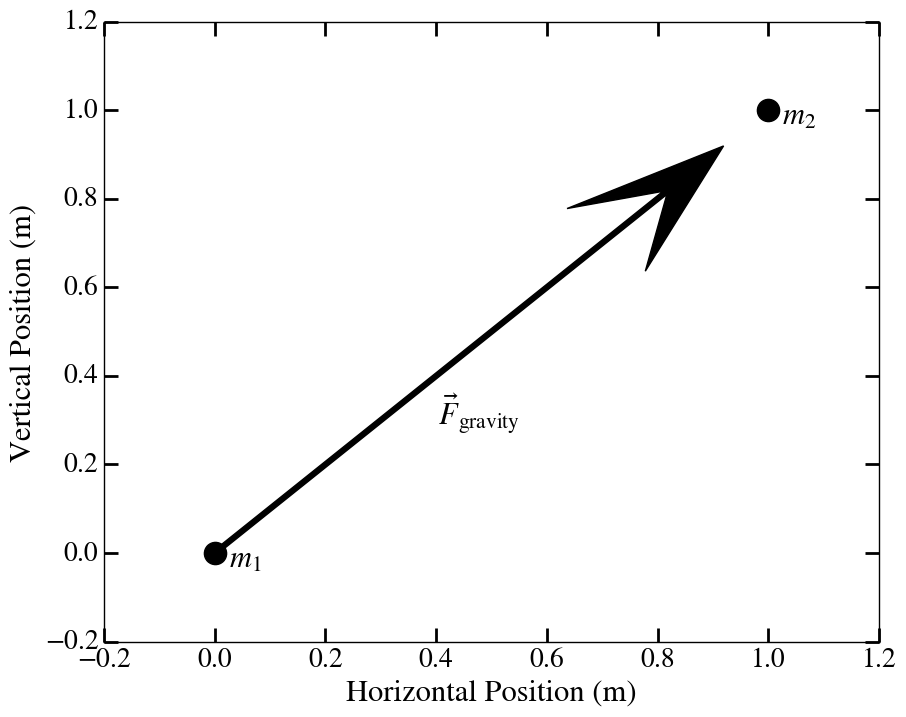

In [9]:
# Make a plot
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

# Draw the masses
ax.scatter(pos1[0], pos1[1], s=256, color='k')
ax.scatter(pos2[0], pos2[1], s=256, color='k')

# Draw the arrow
ax.arrow(pos1[0], pos1[1], force_dir[0], force_dir[1], width=0.01, overhang=0.5, color='k')

# Annotate masses
ax.annotate(r'$m_1$', pos1, (10, -10), textcoords='offset points', fontsize=22, arrowprops={'arrowstyle': '-',})
ax.annotate(r'$m_2$', pos2, (10, -10), textcoords='offset points', fontsize=22, arrowprops={'arrowstyle': '-',})

# Annotate vector
ax.annotate(r'$\vec F_{\rm{gravity}}$', (pos1 + force_dir)/2., (20, -20), textcoords='offset points', fontsize=22,)

ax.set_xlabel('Horizontal Position (m)', fontsize=22)
ax.set_ylabel('Vertical Position (m)', fontsize=22)

plt.show()

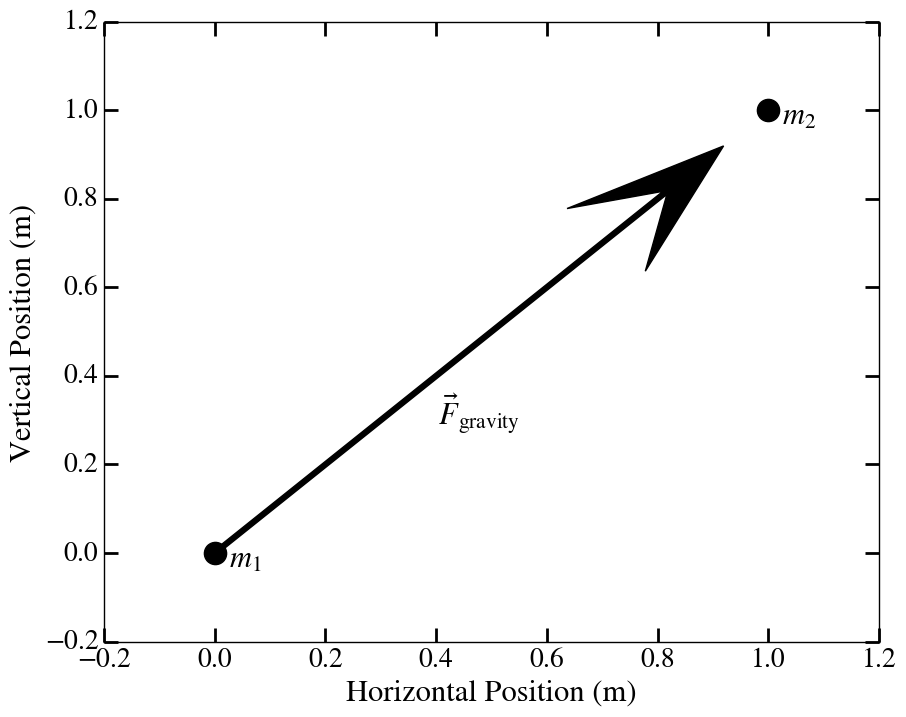

In [10]:
n_body_checks.plot_force_of_gravity(n_body_physics.calculate_force)

# All the Forces on a Particle Plot

In [11]:
# Default plotting values

parameters = {
  'n_particles' : np.random.randint(3, 10),
  'n_dimensions' : 2,
  'G' : 6.67e-11,
}

particles = {
  'masses' : np.random.uniform(0., 5.e4, parameters['n_particles']),
  'positions' : np.random.uniform(0., 3., (parameters['n_particles'], parameters['n_dimensions'])),
  'velocities' : np.random.uniform(-3., 3., (parameters['n_particles'], parameters['n_dimensions'])),
}

In [12]:
i = 0

total_force = n_body_physics.calculate_net_force_on_particle(i, particles, parameters)

print total_force

[-0.00792033 -0.05606699]


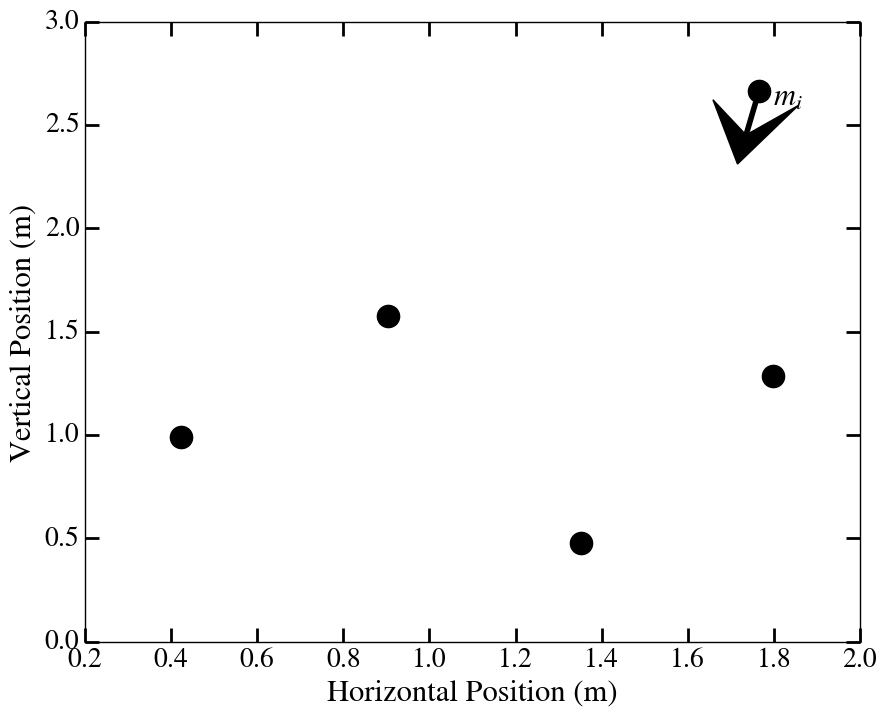

In [13]:
# Make a plot
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

# Draw the masses
ax.scatter(particles['positions'][:,0], particles['positions'][:,1], s=256, color='k')

# Draw the arrow
ax.arrow(particles['positions'][i,0], particles['positions'][i,1], total_force[0], total_force[1], width=0.01, overhang=0.5, color='k')

# Annotate masses
ax.annotate(r'$m_i$', particles['positions'][i], (10, -10), textcoords='offset points', fontsize=22, arrowprops={'arrowstyle': '-',})

ax.set_xlabel('Horizontal Position (m)', fontsize=22)
ax.set_ylabel('Vertical Position (m)', fontsize=22)

save_dir = os.path.dirname(os.path.abspath(''))
save_file = './total_force_plot.pdf'.format(save_dir)

plt.savefig(save_file, dpi=150)

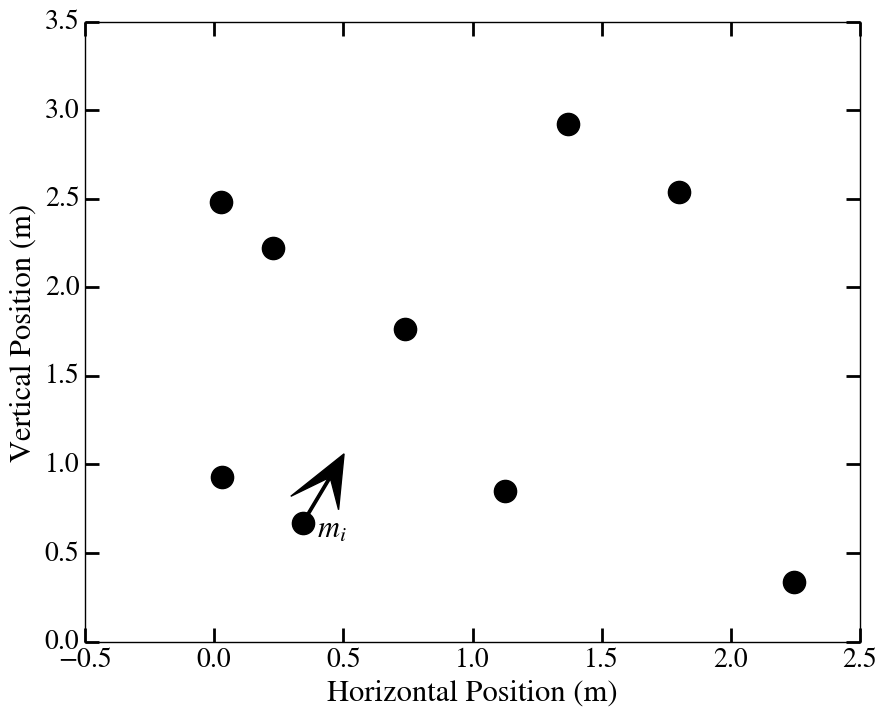

In [25]:
n_body_checks.plot_total_force(n_body_physics.calculate_net_force_on_particle)

In [15]:
def calculate_net_force_on_a_particle():
  
  # Loop through all particles
  
  
  

IndentationError: expected an indented block (<ipython-input-15-4808458cb4cd>, line 6)

# All the Forces on All Particles Plot

In [ ]:
# Get the total forces out

total_forces = n_body_physics.calculate_net_force_on_all_particles(particles, parameters)

print total_forces

In [ ]:
# Make a plot
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

# Draw the masses
ax.scatter(particles['positions'][:,0], particles['positions'][:,1], s=256, color='k')

# Draw the arrow
for i in range(len(particles['masses'])):
  ax.arrow(particles['positions'][i,0], particles['positions'][i,1], total_forces[i,0], total_forces[i,1], width=0.01, overhang=0.5, color='k')

  # Annotate masses
  ax.annotate(r'$m_{}$'.format(i), particles['positions'][i], (10, -10), textcoords='offset points', fontsize=22, arrowprops={'arrowstyle': '-',})

ax.set_xlabel('Horizontal Position (m)', fontsize=22)
ax.set_ylabel('Vertical Position (m)', fontsize=22)

save_dir = os.path.dirname(os.path.abspath(''))
save_file = './all_total_forces_plot.pdf'.format(save_dir)

plt.savefig(save_file, dpi=150)

In [ ]:
n_body_checks.plot_all_total_forces(n_body_physics.calculate_net_force_on_all_particles)